In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
import datetime

In [ ]:
df = pd.read_excel('Data Analyst - Test Data.xlsx')

In [ ]:
df

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America
6444,·the internet barely worked or didn't work,2019-07-12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America


In [ ]:
df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Review,date,Location
count,6393,6448,1711
unique,6384,385,1082
top,Amazing\n \n Read more\n Read less,2019-06-01 00:00:00,United States of America
freq,4,150,116
first,NaN,2018-08-01 00:00:00,NaN
last,NaN,2019-08-20 00:00:00,NaN


In [ ]:
df.count()

Review      6393
date        6448
Location    1711
dtype: int64

In [ ]:
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

# Location

In [ ]:
df['Location'].isnull().sum()/df.shape[0]

0.7346464019851117

73% of the locations column are null values

In [ ]:
df['Location'].unique()

array(['Sebastian', 'Los Angeles', 'Georgia', ..., 'India', 'Malaysia',
       'Trinidad and Tobago'], dtype=object)

In [ ]:
df['Location'].value_counts().sort_values(ascending=False)

United States of America    116
New York                     34
San Jose                     19
California                   19
Florida                      16
                           ... 
Corinth                       1
mississauga                   1
Braintree ma                  1
San Antonio,TX                1
Kristinehamn                  1
Name: Location, Length: 1082, dtype: int64

In [ ]:
df['Location'].dropna()

0                      Sebastian
1                    Los Angeles
2                        Georgia
4                    Palm Harbor
10                    California
                  ...           
6443    United States of America
6444    United States of America
6445    United States of America
6446    United States of America
6447    United States of America
Name: Location, Length: 1711, dtype: object

Most of the reviews are from the USA

# Date

In [ ]:
len(df['date'].unique())

385

Range August 2018- August 2019

In [ ]:
print(df['date'].max().strftime('%Y/%m'),'-',df['date'].min().strftime('%Y/%m'))

2019/08 - 2018/08


In [ ]:
df['month-year']=(df['date'].dt.month).astype(str)+'-'+(df['date'].dt.year).astype(str)

In [ ]:
df['yyyy-mm-dd'] = pd.to_datetime(df['month-year'],format='%m-%Y')

In [ ]:
df

,Review,date,Location,month-year,yyyy-mm-dd
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,8-2019,2019-08-01
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,8-2019,2019-08-01
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,8-2019,2019-08-01
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN,8-2019,2019-08-01
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,8-2019,2019-08-01
...,...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America,7-2019,2019-07-01
6444,·the internet barely worked or didn't work,2019-07-12,United States of America,7-2019,2019-07-01
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America,7-2019,2019-07-01
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America,7-2019,2019-07-01


In [ ]:
df['month-year'].value_counts().sort_values(ascending=False)

12-2018    630
3-2019     605
4-2019     593
7-2019     549
5-2019     526
10-2018    524
11-2018    519
1-2019     513
9-2018     481
8-2018     438
2-2019     418
6-2019     362
8-2019     290
Name: month-year, dtype: int64

Most reviews in December 2018
Least reviews in August 2019
The number of reviews is steadily declining.

In [ ]:
pd.to_datetime(df['month-year'],format='%m-%Y').value_counts().sort_index()

2018-08-01    438
2018-09-01    481
2018-10-01    524
2018-11-01    519
2018-12-01    630
2019-01-01    513
2019-02-01    418
2019-03-01    605
2019-04-01    593
2019-05-01    526
2019-06-01    362
2019-07-01    549
2019-08-01    290
Name: month-year, dtype: int64

Text(0, 0.5, 'Total Reviews')

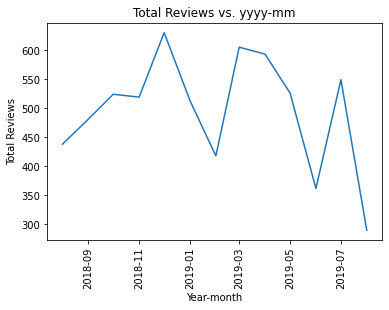

In [ ]:
plt.plot(pd.to_datetime(df['month-year'],format='%m-%Y').value_counts().sort_index())
plt.xticks(rotation=90)
plt.title('Total Reviews vs. yyyy-mm')
plt.xlabel('Year-month')
plt.ylabel('Total Reviews')

#Review

In [ ]:
pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
sentiment_pipe = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
review_np = (df['Review'].dropna()).astype(str).to_list()

In [ ]:
encoded_inputs = tokenizer(review_np,  padding=True, truncation=True, max_length=30, return_tensors="pt")

In [ ]:
encoded_inputs

{'input_ids': tensor([[ 101,  146, 1108,  ..., 1848, 2546,  102],
        [ 101, 1109, 4045,  ...,    0,    0,    0],
        [ 101, 2038, 2450,  ...,    0,    0,    0],
        ...,
        [ 101,  218, 1103,  ...,    0,    0,    0],
        [ 101,  218, 1195,  ..., 1196, 1103,  102],
        [ 101,  218, 2546,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
decoded = []
for ids in encoded_inputs["input_ids"]:
  decoded.append(tokenizer.decode(ids))

In [ ]:
decoded

['[CLS] I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff [SEP]',
 '[CLS] The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok Read more Read less [SEP] [PAD] [PAD] [PAD]',
 '[CLS] Great location! I have stayed at this hotel on my last three trips to New York. Read more Read less [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]',
 '[CLS] The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front [SEP]',
 '[CLS] Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff Read more Read less [SEP] [PAD] [PAD] [PAD] [PAD] [PAD]',
 '[CLS] All the options for fun were great! Do wish there were a better policy on the lazy river floats. Lots of people Hoarding [SEP]',
 '[CLS] Old. Musty. Motel. Bath need an update asap!!!!!! Read more Read less [SEP] [PAD] [PAD

In [ ]:
#arr = sentiment_pipe(decoded)

In [ ]:
review_Series = df['Review'].dropna().copy()
review_Series.reset_index()

,index,Review
0,0,I was very impressed with the resort.\n Great ...
1,1,The rooms were nice the outside needs work als...
2,2,Great location! I have stayed at this hotel on...
3,3,The hotel was adequate for my stay. The strips...
4,4,"Great location, room was large and spacious. P..."
...,...,...
6388,6443,"·the staff were all so friendly. frank, the ch..."
6389,6444,·the internet barely worked or didn't work
6390,6445,·the location was great.\n \n \n \n \n ·the be...
6391,6446,·we were early for check in and the staff was ...


In [ ]:
len(arr)

6393

In [ ]:
sen_arr = [x['label'] for x in arr]

In [ ]:
review_sen_df = pd.DataFrame({'REVIEW': review_Series, 'Sentiment': sen_arr})

In [ ]:
review_sen_df['Sentiment'].value_counts()

NEGATIVE    3211
POSITIVE    3182
Name: Sentiment, dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
review_sen_df

,REVIEW,Sentiment
0,I was very impressed with the resort.\n Great ...,POSITIVE
1,The rooms were nice the outside needs work als...,NEGATIVE
2,Great location! I have stayed at this hotel on...,NEGATIVE
3,The hotel was adequate for my stay. The strips...,NEGATIVE
4,"Great location, room was large and spacious. P...",POSITIVE
...,...,...
6443,"·the staff were all so friendly. frank, the ch...",POSITIVE
6444,·the internet barely worked or didn't work,NEGATIVE
6445,·the location was great.\n \n \n \n \n ·the be...,NEGATIVE
6446,·we were early for check in and the staff was ...,POSITIVE


In [ ]:
df1.dropna(subset=['Review'],inplace=True)
df1.reset_index(inplace=True)

In [ ]:
df1 = pd.concat((df1,pd.Series(sen_arr, name='Sen')),1)

In [ ]:
df1

,index,Review,date,Location,month-year,yyyy-mm-dd,Sen
0,0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,8-2019,2019-08-01,POSITIVE
1,1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,8-2019,2019-08-01,NEGATIVE
2,2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,8-2019,2019-08-01,NEGATIVE
3,3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN,8-2019,2019-08-01,NEGATIVE
4,4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,8-2019,2019-08-01,POSITIVE
...,...,...,...,...,...,...,...
6388,6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America,7-2019,2019-07-01,POSITIVE
6389,6444,·the internet barely worked or didn't work,2019-07-12,United States of America,7-2019,2019-07-01,NEGATIVE
6390,6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America,7-2019,2019-07-01,NEGATIVE
6391,6446,·we were early for check in and the staff was ...,2019-07-10,United States of America,7-2019,2019-07-01,POSITIVE


Text(0, 0.5, 'Number of Reviews(Positive/Negative)')

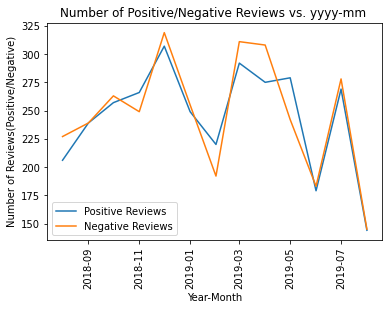

In [ ]:
plt.plot(df1[df1['Sen']=='POSITIVE'].groupby('yyyy-mm-dd').count()['Sen'])
plt.plot(df1[df1['Sen']=='NEGATIVE'].groupby('yyyy-mm-dd').count()['Sen'])
plt.legend(["Positive Reviews", "Negative Reviews"])
plt.xticks(rotation=90)
plt.title('Number of Positive/Negative Reviews vs. yyyy-mm ')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews(Positive/Negative)')

In [ ]:
df1[df1['Location'].isin(['United States of America','New York','California'])].groupby('Sen').

,index,Review,date,Location,month-year
Sen,,,,,
NEGATIVE,84,84,84,84,84
POSITIVE,66,66,66,66,66


In [ ]:
df_loc_sen = df1[df1['Location'].isin(['United States of America','New York','San Jose','California','Florida'])].loc[:,['Location','Sen']]

In [ ]:
df_loc_sen

,Location,Sen
10,California,POSITIVE
102,New York,NEGATIVE
147,New York,NEGATIVE
174,California,POSITIVE
432,Florida,POSITIVE
...,...,...
6388,United States of America,POSITIVE
6389,United States of America,NEGATIVE
6390,United States of America,NEGATIVE
6391,United States of America,POSITIVE


Text(0.5, 1.0, 'Negative vs Positive Reviews in top 5 Locations with most reviews')

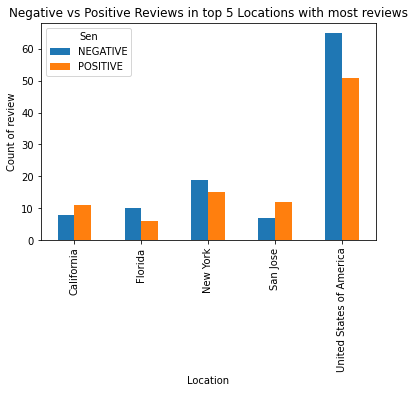

In [ ]:
(df_loc_sen.groupby(['Location','Sen'])['Sen'].count()).unstack('Sen').plot.bar()
plt.ylabel('Count of review')
plt.title('Negative vs Positive Reviews in top 5 Locations with most reviews')